In [1]:
import { document } from "jsr:@ry/jupyter-helper"
import * as Plot from "npm:@observablehq/plot@0.6.17"
import { data } from "../src/data/marriage.ts"
import { fit } from "../src/fit.ts"

In [2]:
const [a, b, c, max, offset] = await fit(data)

console.log(
    [a, b, c, max, offset].map(x => x.toFixed(2)).join(" "),
)

function* arr(n = Infinity) {
    for (let i=0; i<n; i++) {
        yield i
    }
    return
}

const gompertz_cdf =
(...[t, a, b, c, max, offset]: number[]) =>
    max*(1-c*(t-offset)-Math.exp(-a/b*(Math.expm1((t-offset)*b))))

const fitted =
(n = Infinity) => arr(n)
    .map(t => [t, gompertz_cdf(t, a, b, c, max, offset)])

0.06 0.22 -0.01 0.69 17.98


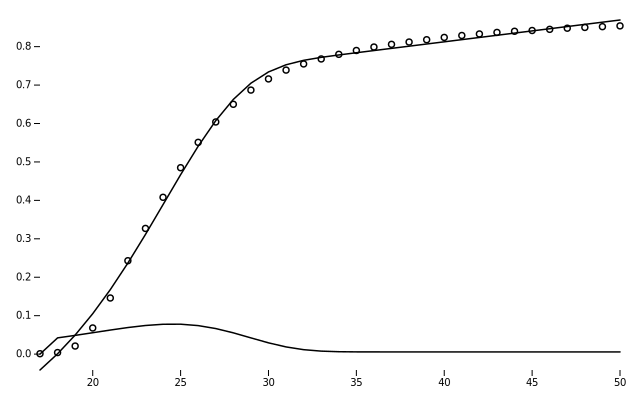

In [3]:
const fittedData = fitted(51).drop(offset).toArray()

Plot.plot({
    marks: [
        Plot.dot(data),
        Plot.line(fittedData),
        Plot.line(
            fittedData
                .map(([x, y], i, l) => [x, y-l[i-1]?.[1] || 0]),
        ),
    ],
    style: {
        background: "oklch(0.3 0.1 270)",
        color: "oklch(0.7 0.1 270)",
    },
    document,
})